In [218]:
# Scraping shopZetu.com Website - Using BeautifulSoup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

In [219]:
# The website URL
items = requests.get("https://shopzetu.com/collections/new-arrivals")

In [220]:
# Testing whether the website responded to the request
items.text

'<!doctype html>\n<html class="no-js" lang="en" dir="ltr">\n<head>\n<link rel=\'preconnect dns-prefetch\' href=\'https://triplewhale-pixel.web.app/\' crossorigin />\n<link rel=\'preconnect dns-prefetch\' href=\'https://api.config-security.com/\' crossorigin />\n<script>\n/* >> TriplePixel :: start*/\n~function(W,H,A,L,E,_,B,N){function O(U,T,H,R){void 0===R&&(R=!1),H=new XMLHttpRequest,H.open("GET",U,!0),H.send(null),H.onreadystatechange=function(){4===H.readyState&&200===H.status?(R=H.responseText,U.includes(".txt")?eval(R):N[B]=R):(299<H.status||H.status<200)&&T&&!R&&(R=!0,O(U,T-1))}}if(N=window,!N[H+"sn"]){N[H+"sn"]=1;try{A.setItem(H,1+(0|A.getItem(H)||0)),(E=JSON.parse(A.getItem(H+"U")||"[]")).push(location.href),A.setItem(H+"U",JSON.stringify(E))}catch(e){}A.getItem(\'"!nC`\')||(A=N,A[H]||(L=function(){return Date.now().toString(36)+"_"+Math.random().toString(36)},E=A[H]=function(t,e){return W=L(),(E._q=E._q||[]).push([W,t,e]),W},E.ch=W,B="configSecurityConfModel",N[B]=1,O("//conf

In [221]:
# Using beutiful soup to convert the website request into a navigatable code and use some methods on it
soup = BeautifulSoup(items.text, 'html.parser')

In [222]:
# apply find_all method to find all the products
products = soup.find_all('div', class_="grid-product__meta")

In [223]:
products

[<div class="grid-product__meta">
 <div class="grid-product__title grid-product__title--body">Afafla Ankara Dress - Green</div>
 <div class="jdgm-widget jdgm-preview-badge" data-auto-install="false" data-id="8085443674331" data-template="collection" style="">
 <div class="jdgm-prev-badge" data-average-rating="0.00" data-number-of-questions="0" data-number-of-reviews="0" style="display:none"> <span aria-label="0.00 stars" class="jdgm-prev-badge__stars" data-score="0.00" role="button" tabindex="0"> <span class="jdgm-star jdgm--off"></span><span class="jdgm-star jdgm--off"></span><span class="jdgm-star jdgm--off"></span><span class="jdgm-star jdgm--off"></span><span class="jdgm-star jdgm--off"></span> </span> <span class="jdgm-prev-badge__text"> No reviews </span> </div>
 </div>
 <div class="grid-product__price">KSh8,500.00
 </div>
 </div>,
 <div class="grid-product__meta">
 <div class="grid-product__title grid-product__title--body">Afafla African Print Dress - Red</div>
 <div class="jdgm

In [224]:
#first product name
product1 = products[1].find('div', class_="grid-product__title grid-product__title--body").text
product1

'Afafla African Print Dress - Red'

In [228]:
product_list = []

for product in products:
    product_name = product.find('div', class_="grid-product__title grid-product__title--body").text
    product_price = product.find('div', class_="grid-product__price").text
    product_price = product_price.replace("KSh","").replace('\n','')

    
    product_list.append({'name':product_name, 'price':product_price})

# Now, you have a list containing the product names and prices
product_list


[{'name': 'Afafla Ankara Dress - Green', 'price': '8,500.00'},
 {'name': 'Afafla African Print Dress - Red', 'price': '8,999.00'},
 {'name': 'Afafla Ankara Dress - Orange', 'price': '7,999.00'},
 {'name': 'Afafla Ankara Skirt Suit - Beige', 'price': '5,999.00'},
 {'name': 'Afafla Ankara Shirt Dress - Green', 'price': '6,999.00'},
 {'name': 'Afafla Ankara Maxi Dress - Brown', 'price': '7,999.00'},
 {'name': 'Afafla Ankara Lace Dress - Yellow', 'price': '6,999.00'},
 {'name': 'Afafla Jeans Ankara Dress - Blue', 'price': '7,999.00'},
 {'name': 'Afafla Ankara Print Shirt Dress - Green', 'price': '6,000.00'},
 {'name': 'Afafla Striped Shirt Dress - Black', 'price': '5,000.00'},
 {'name': 'Afafla Ankara Print Dress - Red', 'price': '4,999.00'},
 {'name': 'Afafla Ankara Dress - Blue', 'price': '3,999.00'},
 {'name': 'Infy Knit Wear Full Length Pants - Black',
  'price': 'Regular price2,300.00Sale price2,000.00                Save 13%              '},
 {'name': 'Infy Knit Wear Beanies - Black'

In [229]:
# convert the dictionary into a dataframe
df = pd.DataFrame(product_list)
df.drop(index=[12,13,14,15,16,38,39,40,41,72], inplace=True) #dropping rows with problematic labels
pd.set_option('display.max_rows', None)
df


,name,price
0,Afafla Ankara Dress - Green,"8,500.00"
1,Afafla African Print Dress - Red,"8,999.00"
2,Afafla Ankara Dress - Orange,"7,999.00"
3,Afafla Ankara Skirt Suit - Beige,"5,999.00"
4,Afafla Ankara Shirt Dress - Green,"6,999.00"
5,Afafla Ankara Maxi Dress - Brown,"7,999.00"
6,Afafla Ankara Lace Dress - Yellow,"6,999.00"
7,Afafla Jeans Ankara Dress - Blue,"7,999.00"
8,Afafla Ankara Print Shirt Dress - Green,"6,000.00"
9,Afafla Striped Shirt Dress - Black,"5,000.00"


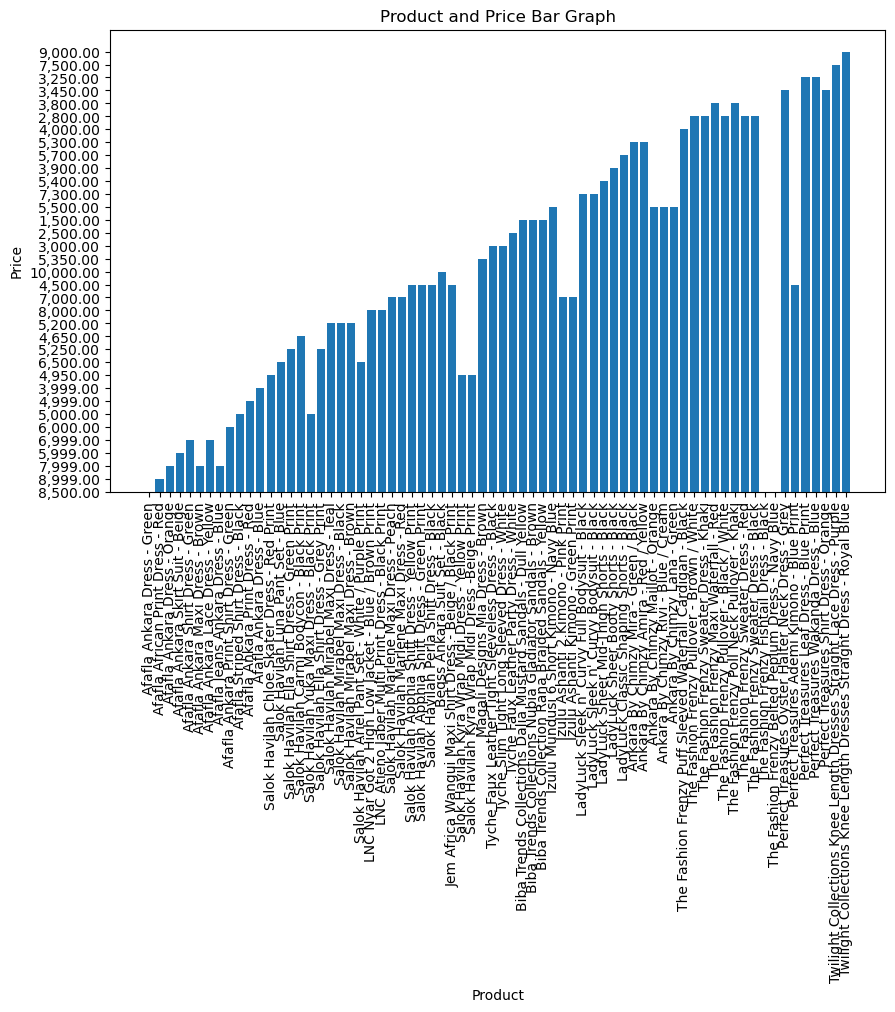

In [230]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['price'])
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Product and Price Bar Graph')
plt.show()